<a href="https://colab.research.google.com/github/YABIGAIL23/SIMULACION-I/blob/main/Tablero_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

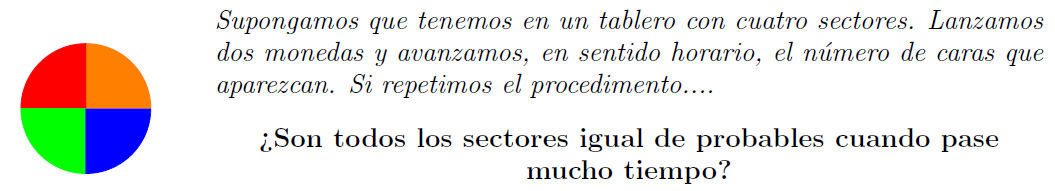

##SOLUCION POR SIMULACION

In [3]:
import numpy as np

def lanzar_monedas():
    """
    Simula el lanzamiento de dos monedas justas.
    Devuelve el número de caras obtenidas (0, 1 o 2).
    """
    return np.random.binomial(n=2, p=0.5)

In [4]:
def mover_posicion(posicion_actual, num_sectores):
    """
    Mueve la posición en el tablero según el resultado de lanzar_monedas().
    El tablero es circular, por lo que usamos módulo para volver al inicio.

    Args:
        posicion_actual: Posición actual en el tablero (0 a num_sectores-1)
        num_sectores: Número total de sectores en el tablero

    Returns:
        Nueva posición después del movimiento
    """
    avance = lanzar_monedas()
    nueva_posicion = (posicion_actual + avance) % num_sectores
    return nueva_posicion

In [5]:
def simular_partida(num_movimientos, num_sectores=4):
    """
    Simula una partida completa con un número determinado de movimientos.

    Args:
        num_movimientos: Cuántas veces se lanzan las monedas y se mueve
        num_sectores: Número total de sectores en el tablero

    Returns:
        Sector final después de todos los movimientos
    """
    posicion = 0  #Empezamos en el sector 0 (Naranja)
    for _ in range(num_movimientos):
        posicion = mover_posicion(posicion, num_sectores)
    return posicion


In [11]:
def simular_experimento(num_partidas, num_sectores=4):
    """
    Realiza múltiples simulaciones para calcular probabilidades finales

    Args:
        num_partidas: Cuántas veces repetir el experimento
        num_movimientos: Movimientos por partida
        num_sectores: Sectores en el tablero

    Returns:
        Diccionario con probabilidades de terminar en cada sector
    """
    #Inicializamos contadores para cada sector
    contador_sectores = {sector: 0 for sector in range(num_sectores)}

    #Realizamos todas las simulaciones
    for _ in range(num_partidas):
        sector_final = simular_partida( num_sectores)
        contador_sectores[sector_final] += 1

    #Convertimos a probabilidades
    probabilidades = {sector: count/num_partidas
                     for sector, count in contador_sectores.items()}

    return probabilidades

In [38]:
#Parámetros
NUM_SIMULACIONES = 1000  #Cuántas veces repetir el experimento

#Ejecutamos la simulación
resultados = simular_experimento(
    num_partidas=NUM_SIMULACIONES
)

In [40]:
#Resultados
print(f"\nProbabilidades después de {NUM_SIMULACIONES} iteraciones:")
for sector, prob in sorted(resultados.items()):
    print(f"Sector {sector}: {prob:.4f}")


Probabilidades después de 1000 iteraciones:
Sector 0: 0.2730
Sector 1: 0.2570
Sector 2: 0.2240
Sector 3: 0.2460


##SOLUCION ANALITICA

#Probabilidad de los resultados del lanzamiento de monedas

Al lanzar dos monedas justas, tenemos las siguientes probabilidades para cada resultado posible:


$P(\text{0 caras}) = P(\text{SS}) = \frac{1}{4}$

$P(\text{1 cara}) = P(\text{CS}) + P(\text{SC}) = \frac{1}{2}$

$P(\text{2 caras}) = P(\text{CC}) = \frac{1}{4}$


**Definición de las probabilidades por sector**

Definimos las probabilidades de estar en cada sector (color) después de $n$ movimientos:


$X_n = P(\text{Naranja}), \quad Y_n = P(\text{Azul})$

$Z_n = P(\text{Verde}), \quad T_n = P(\text{Rojo})$


**Relaciones de recurrencia entre estados**

Aplicando el Teorema de Probabilidad Total, obtenemos las siguientes relaciones:

Para el sector Naranja (0):

$X_{n+1} = \frac{1}{4}X_n + \frac{1}{4}Z_n + \frac{1}{2}T_n$

Para el sector Azul (1):

$Y_{n+1} = \frac{1}{2}X_n + \frac{1}{4}Y_n + \frac{1}{4}T_n$

Para el sector Verde (2):

$Z_{n+1} = \frac{1}{4}X_n + \frac{1}{2}Y_n + \frac{1}{4}Z_n$

Para el sector Rojo (3):

$T_{n+1} = \frac{1}{4}Y_n + \frac{1}{2}Z_n + \frac{1}{4}T_n$

**Matriz de transicion**

Podemos expresar el sistema en forma matricial como:


$\begin{pmatrix}
X_{n+1} \\
Y_{n+1} \\
Z_{n+1} \\
T_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4}
\end{pmatrix}
\begin{pmatrix}
X_n \\
Y_n \\
Z_n \\
T_n
\end{pmatrix}$

Solución de estado estacionario

En el estado estacionario (cuando $n \to \infty$), las probabilidades convergen a valores fijos:


$X_{n+1} = X_n = X$

$Y_{n+1} = Y_n = Y$

$Z_{n+1} = Z_n = Z$

$T_{n+1} = T_n = T$

Además, por normalización:
$X + Y + Z + T = 1$

Resolviendo el sistema de ecuaciones, obtenemos:

$X = \frac{1}{4}, \quad Y = \frac{1}{4}, \quad Z = \frac{1}{4}, \quad T = \frac{1}{4}$


**Conclusión**

Después de muchos movimientos ($n \to \infty$), la probabilidad de estar en cualquier sector converge a:


$P(\text{Naranja}) = P(\text{Azul}) = P(\text{Verde}) = P(\text{Rojo}) = \frac{1}{4}$

Por lo tanto, todos los sectores son equiprobables a largo plazo, con una probabilidad del 25\% para cada uno.
